# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [34]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

639

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [35]:
#entering url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [36]:
# Producing lists for different API parameters 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# setting counter 
record = 1

#printing statement
print(f"Beginning Data Retrieval | Cities")
print(f"---------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record}      | {city_record}")
       
        
        # Increasing the counter 
        record= record + 1
           
    # if there is no record, "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval | Cities
---------------------------------
Processing Record 1      | Bredasdorp
Processing Record 2      | Augusto Correa
Processing Record 3      | Tuktoyaktuk
Processing Record 4      | Vaini
Processing Record 5      | Pisco
Processing Record 6      | Royan
Processing Record 7      | Esperance
Processing Record 8      | Port Blair
Processing Record 9      | Saint-Augustin
City not found. Skipping...
Processing Record 10      | Tasiilaq
Processing Record 11      | Wagga Wagga
Processing Record 12      | Ponta do Sol
Processing Record 13      | Nata
Processing Record 14      | Barrow
City not found. Skipping...
Processing Record 15      | Cumana
Processing Record 16      | Los Llanos de Aridane
City not found. Skipping...
Processing Record 17      | Rikitea
Processing Record 18      | Puerto Ayora
Processing Record 19      | Pangnirtung
Processing Record 20      | Pevek
Processing Record 21      | Areosa
Processing Record 22      | Busselton
Processing Record 

Processing Record 199      | Avera
City not found. Skipping...
Processing Record 200      | Aripuana
Processing Record 201      | Necochea
Processing Record 202      | Dickinson
Processing Record 203      | Coreau
Processing Record 204      | Auki
Processing Record 205      | Kahului
Processing Record 206      | Petropavlovsk-Kamchatskiy
Processing Record 207      | Ahuimanu
City not found. Skipping...
Processing Record 208      | Qaqortoq
Processing Record 209      | Karaton
Processing Record 210      | Belle Fourche
Processing Record 211      | Husavik
Processing Record 212      | Sabirabad
Processing Record 213      | Carnarvon
Processing Record 214      | Mandal
Processing Record 215      | Mayo
Processing Record 216      | Ismailia
Processing Record 217      | Hithadhoo
Processing Record 218      | Zyryanka
Processing Record 219      | Serik
Processing Record 220      | Port Shepstone
Processing Record 221      | Vardo
City not found. Skipping...
Processing Record 222      | Heihe

Processing Record 397      | Chapais
Processing Record 398      | Hofn
Processing Record 399      | Dundee
Processing Record 400      | Gainesville
Processing Record 401      | Pacifica
Processing Record 402      | Atasu
Processing Record 403      | Tautira
City not found. Skipping...
Processing Record 404      | Coihaique
Processing Record 405      | Salalah
Processing Record 406      | San Rafael
Processing Record 407      | Turukhansk
Processing Record 408      | Cidreira
Processing Record 409      | Katsuura
Processing Record 410      | Noumea
Processing Record 411      | Nizwa
City not found. Skipping...
Processing Record 412      | Hirado
Processing Record 413      | Radcliff
Processing Record 414      | Vao
Processing Record 415      | Gigmoto
Processing Record 416      | Gornozavodsk
Processing Record 417      | Port Elizabeth
Processing Record 418      | Monster
Processing Record 419      | Coquimbo
Processing Record 420      | Horadiz
Processing Record 421      | Taoudenni
Pr

In [37]:
#creating a dictionary a dictonary with the lists generated
weather_conditions = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# establishing a dataframe including the above elements
weathers = pd.DataFrame(weather_conditions)

# displaying the dataframe 
weathers.count()

City          577
Cloudiness    577
Country       577
Date          577
Humidity      577
Lat           577
Lng           577
Max Temp      577
Wind Speed    577
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [38]:
#saving data to a CSV file
weathers.to_csv("output_data/cities.csv")

# displaying data frame 
weathers.head()



,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bredasdorp,0,ZA,1566797018,71,-34.53,20.04,55.40,8.05
1,Augusto Correa,0,BR,1566797117,98,-1.02,-46.63,71.36,2.19
2,Tuktoyaktuk,90,CA,1566797015,93,69.44,-133.03,44.60,2.24
3,Vaini,40,IN,1566797013,65,15.34,74.49,78.80,9.17
4,Pisco,90,PE,1566797014,77,-13.71,-76.20,60.80,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

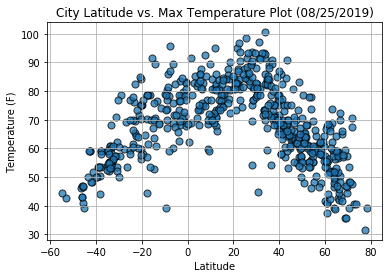

In [43]:
#creating the scatter plots
plt.scatter(weathers["Lat"], weathers["Max Temp"], marker="o", s=50, alpha = 0.75, edgecolor = "black")

#locating the graph properties
plt.title("City Latitude vs. Max Temperature Plot (08/25/2019)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the plot
plt.savefig("output_data/Latitude vs. Temperature Plot.png")

#displaying the plot
plt.show()

#### Latitude vs. Humidity Plot

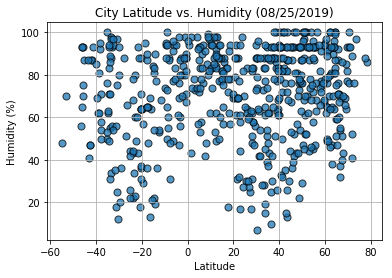

In [45]:
#creating the scatter plots
plt.scatter(weathers["Lat"], weathers["Humidity"], marker="o", s=50, alpha = 0.75, edgecolor = "black")

#locating the graph properties
plt.title("City Latitude vs. Humidity (08/25/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the plot
plt.savefig("output_data/Latitude vs. Humidity Plot.png")

#displaying the plot
plt.show()

#### Latitude vs. Cloudiness Plot

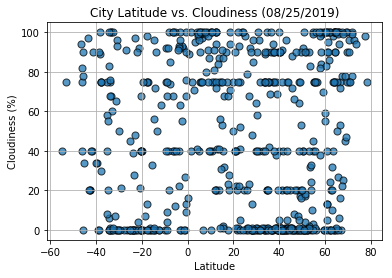

In [46]:
#creating the scatter plots
plt.scatter(weathers["Lat"], weathers["Cloudiness"], marker="o", s=50, alpha = 0.75, edgecolor = "black")

#locating the graph properties
plt.title("City Latitude vs. Cloudiness (08/25/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the plot
plt.savefig("output_data/Latitude vs. Cloudiness Plot.png")

#displaying the plot
plt.show()

#### Latitude vs. Wind Speed Plot

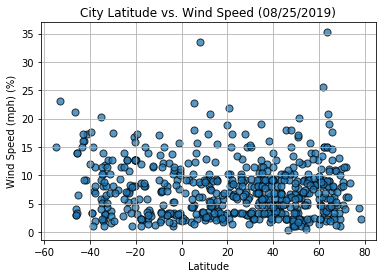

In [47]:
#creating the scatter plots
plt.scatter(weathers["Lat"], weathers["Wind Speed"], marker="o", s=50, alpha = 0.75, edgecolor = "black")

#locating the graph properties
plt.title("City Latitude vs. Wind Speed (08/25/2019)")
plt.ylabel("Wind Speed (mph) (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the plot
plt.savefig("output_data/Latitude vs. Winds Speed Plot.png")

#displaying the plot
plt.show()

THREE OBSERVABLE TRENDS 

The latitude vs. temperature plot tells us that, the max. temps increase from the poles towards the Equator in both North and South Hemisphere. This is called "Latitude Effect" in Geography (By the way, the cities in Southern Hemisphere have negative latitude numbers while the Northerners have positive). However, temperatures make a peak at around 20 degrees North latitude, not exactly at the equator line. This can be explained due to the different cooling and warming features of oceans and lands. Moreover, lands cover more areas in Nortern Hemisphere compared to the Southern one. Lands have low specific heat causing the existence more max. temps in the Northern Hemisphere.

It seems that there is no strong correlation between latitude and humidity. The related plot shows a great variety of values at the same or similar latitudes. However, the humidity rates are slightly  more in Norhern Hemisphere compared to the Southern Hemisphere. It can be explained by the existance of more cities in the Northern Hemisphere because the Northern Hemisphere one has more lands then the South Hemisphere.

Wind speed appears to vary between roughly 0-10 mph and has a tendency of slightly increasing from the equator towards the poles.
